github link: https://github.com/augustthedoodle/ecen610

LAB 3: Analysis and Simulation of switched Gm-C Filters

1. Consider the following circuit, where N=8 and the frequency of the clocks is 2.4 GHz and Cs=15.925 pF. The capacitors are charged in a cyclic fashion by the input current iRF. Similarly, the voltage stored in the capacitors Cs is read cyclically at the end of each consecutive N cycles. The output of the circuit is the concatenation of the cyclic readings of the voltages. 

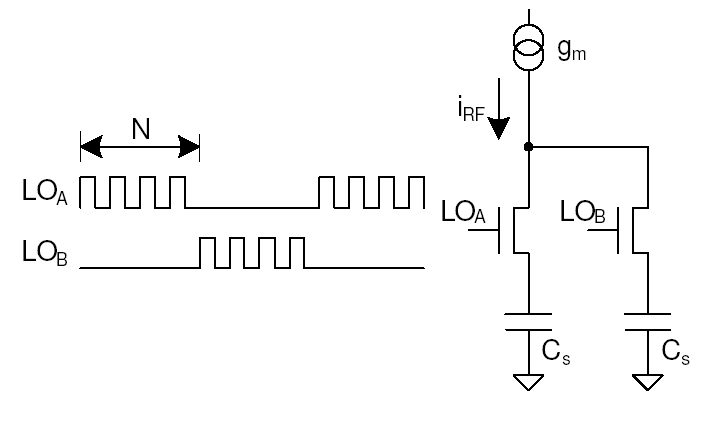

Consider the following 2 cases:
a) The capacitors are discharged after each read out operation, i.e. the charge of the capacitors is zero at the beginning of the integration of every N cycles.
b) The capacitors are never discharged.
In both cases find the filter transfer function H(f)=Vo(f)/iRF(f) where Vo(f) is the capacitor voltage. Please use a mathematical description of how the transfer function is found and then use Python to plot the transfer functions.

a) transfer function is proportional to number of sample clock pulse if capacitors are discharged after each readout

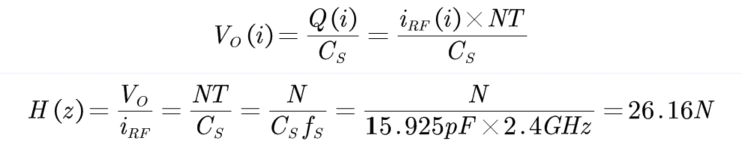


b) below is transfer function when capacitors are never discharged, which is one pole IIR filter.

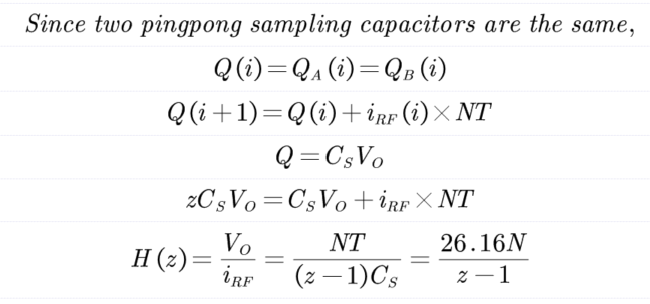

/home/sxie/.venv/lib/python3.8/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/home/sxie/.venv/lib/python3.8/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


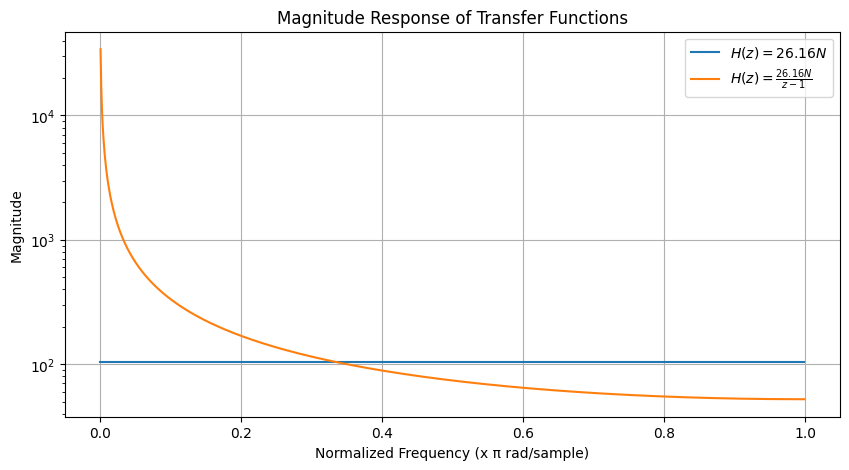

In [ ]:
# plot transfer function

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

N=4
H1_num = [26.16*N]      # H(z) = 1 (constant)
H1_den = [1]      

H2_num = [26.16*N]      # H(z) = 1 / (z - 1)
H2_den = [1, -1]  

# Compute frequency response
w, H1 = freqz(H1_num, H1_den, worN=1024)
w, H2 = freqz(H2_num, H2_den, worN=1024)

# Plot magnitude response
plt.figure(figsize=(10, 5))
plt.semilogy(w / np.pi, np.abs(H1), label=r"$H(z) = 26.16N$")
plt.semilogy(w / np.pi, np.abs(H2), label=r"$H(z) of IIR$")
plt.xlabel("Normalized Frequency (x π rad/sample)")
plt.ylabel("Magnitude")
plt.title("Magnitude Response of Transfer Functions")
plt.legend()
plt.grid()
plt.show()


2. Now consider the addition of a “history” capacitor CH=15.425 pF and a “rotating” capacitor CR=0.5 pF.
a.) Explain the effect of adding the capacitor CH in the transfer function that was calculated in problem 1.
b.) Find the new transfer function and plot it using Python.

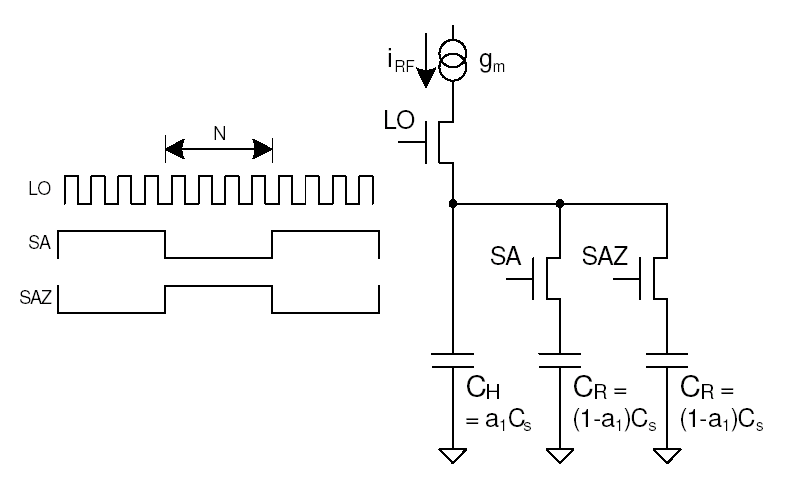

a) CH can keep the ratioed value of previous charge which will not be affected by readout.

b) transfer function with histroy capacitor:

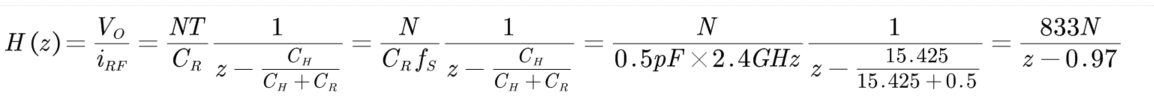


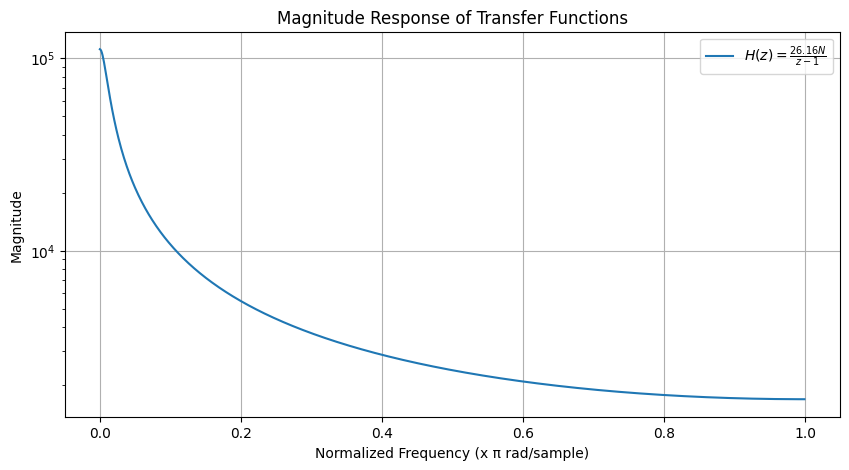

In [ ]:
#plot transfer function

# plot transfer function

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

N=4
  
H2_num = [833*N]      # H(z) = 1 / (z - 1)
H2_den = [0.97, -1]  

# Compute frequency response
w, H2 = freqz(H2_num, H2_den, worN=1024)

# Plot magnitude response
plt.figure(figsize=(10, 5))
plt.semilogy(w / np.pi, np.abs(H2), label=r"$H(z) of IIR$")
plt.xlabel("Normalized Frequency (x π rad/sample)")
plt.ylabel("Magnitude")
plt.title("Magnitude Response of Transfer Functions")
plt.legend()
plt.grid()
plt.show()


3. Consider the following circuit. This is just an extension of the previous circuit where the cyclic operation is extended to 8 capacitors. As in the previous circuit, every capacitor also stores N=8 cycles of the input switched current. The output voltage is defined as the voltage resulting from the physical connection of the bank of 4 capacitors enclosed by the rectangle in the figure. This read out operation is also made in a cyclic fashion between the 2 bank of capacitors. Assume ideal transistors and an ideal transconductance gm. Find a mathematical expression for the transfer function and plot in Python for the following 2 situations.
a) The 4 capacitors are discharged after their connection and read out operation, i.e. the charge of the capacitors is zero at the beginning of the integration of every N cycles.
b) The capacitors are never discharged.
c) The capacitors are discharged but they have different sizes, i.e. CR1, CR2, CR3, CR4.

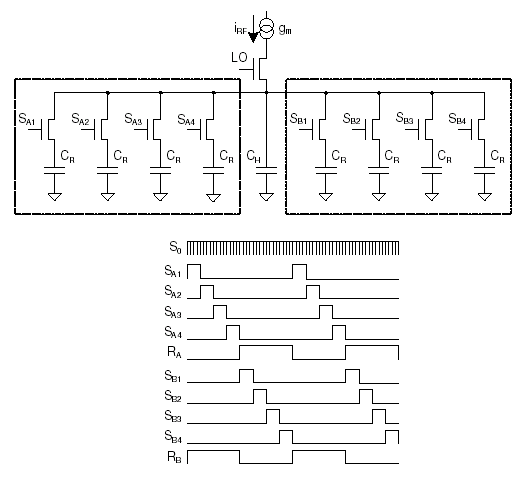

a) 4 capacitors are discharged after read out operation,

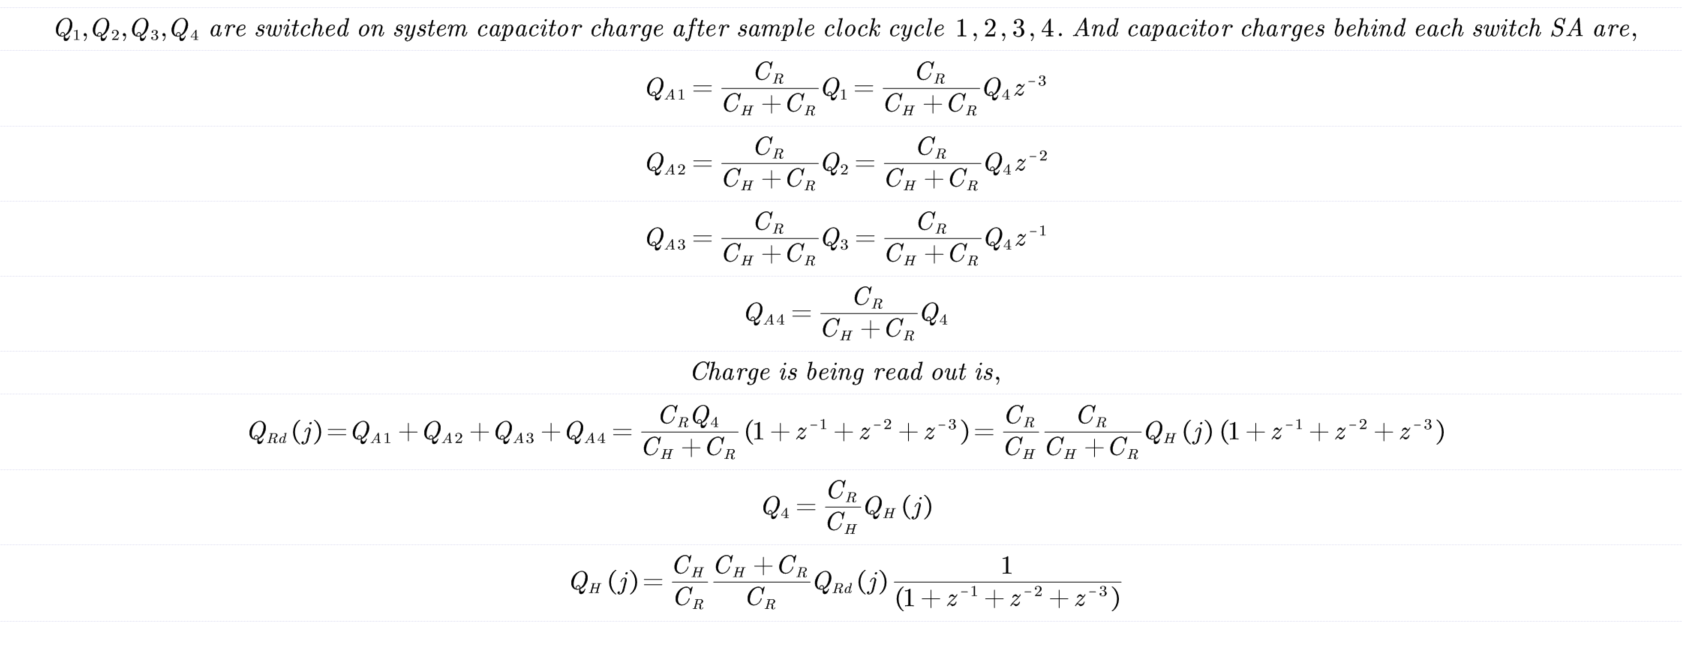

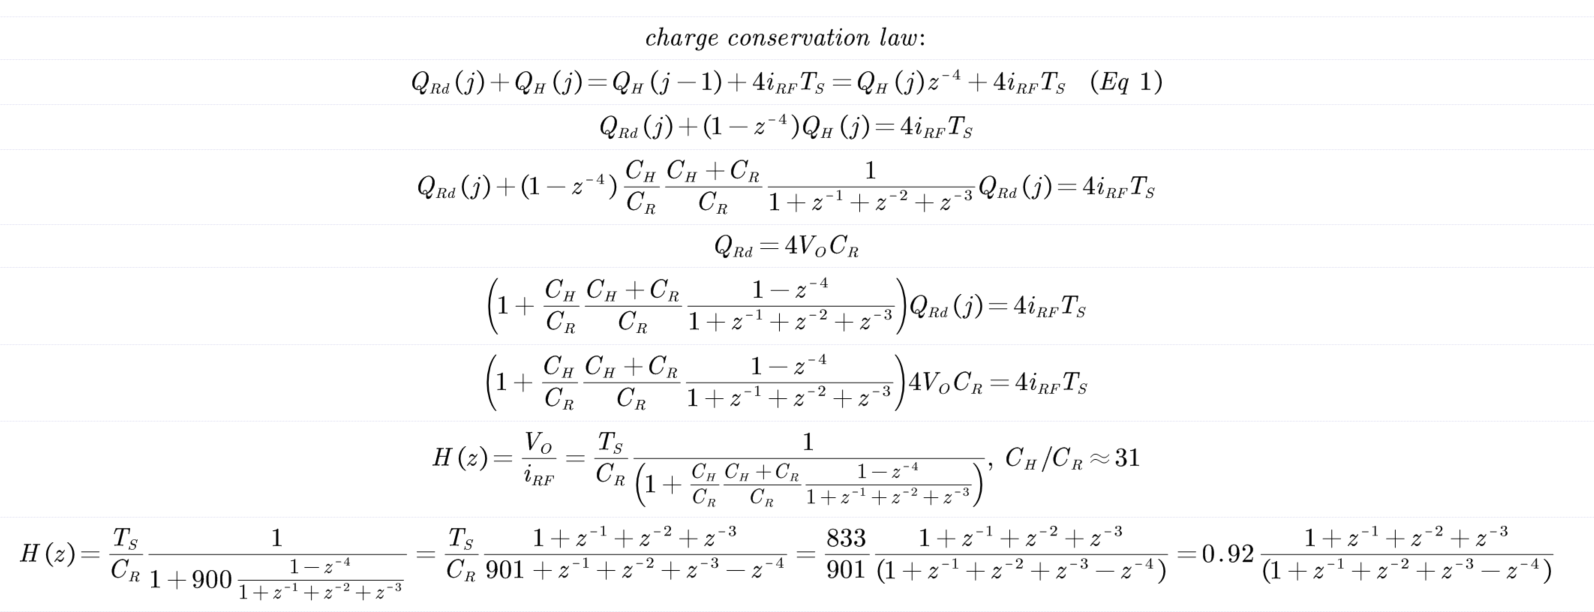

b) capacitors are never discharged

Equation in a) can be re-used till Eq 1.

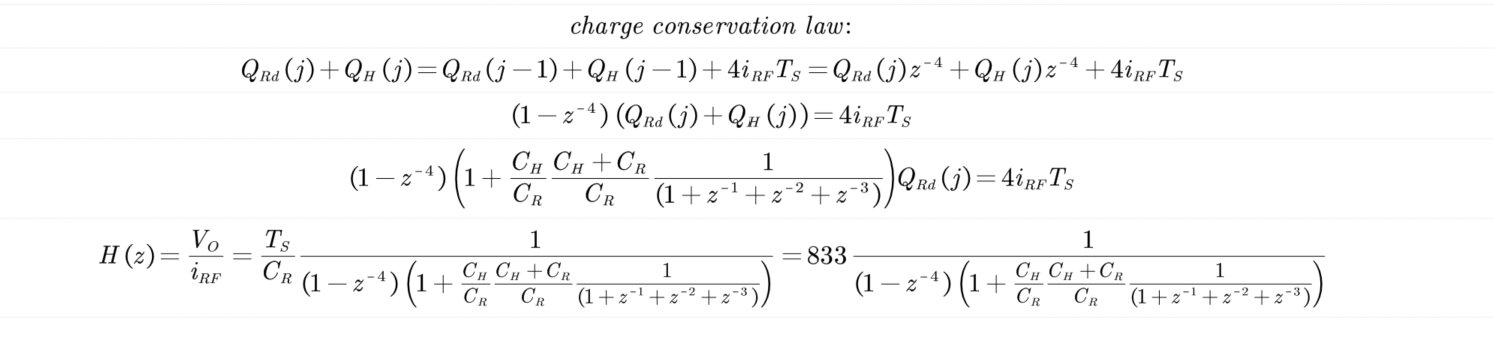


c) capacitors are charged but with different sizes

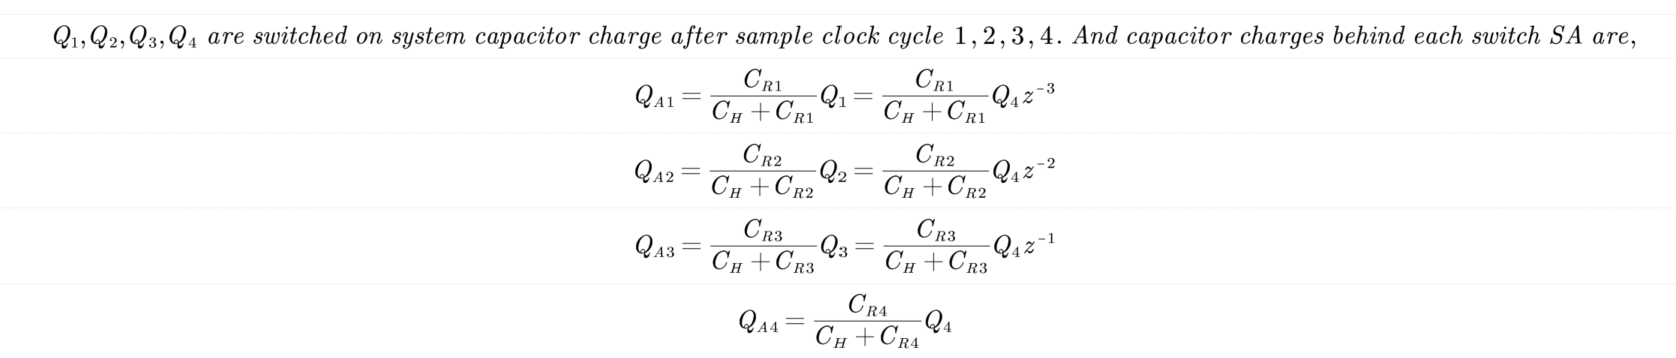